In [93]:
import pandas as pd
import numpy as np

from tabulate import tabulate

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Load source data from Github

In [94]:
url = 'https://raw.githubusercontent.com/vicky727luo/Maxlulu/main/Lending%20Club%20Project/loan_training_data.csv'
LoanData = pd.read_csv(url)
LoanData.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,31048,1,3,0,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,30000.0,Source Verified,car,GA,1.00,36251,5,3,0,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,43040,2,2,0,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,35096,1,10,0,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,43043,3,9,0,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


Data Overview

In [95]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   object 
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   object 
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   object 
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   object 
 12  purpose              9004 non-null   object 
 13  addr_state           9004 non-null   object 
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

In [96]:
LoanData.nunique()

id                     9004
loan_amnt               604
funded_amnt             681
funded_amnt_inv        1234
term                      2
int_rate                 70
installment            3871
grade                     7
emp_length               11
home_ownership            3
annual_inc             1555
verification_status       3
purpose                  13
addr_state               45
dti                    2559
earliest_cr_line        458
inq_last_6mths            9
open_acc                 33
pub_rec                   3
revol_bal              7573
revol_util             1023
total_acc                63
out_prncp                 1
out_prncp_inv             1
total_pymnt            8962
total_pymnt_inv        8942
total_rec_prncp        2199
total_rec_int          8838
loan_status               2
dtype: int64

In [97]:
LoanData.isnull().sum()

id                       0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
emp_length             316
home_ownership           0
annual_inc               0
verification_status      0
purpose                  0
addr_state               0
dti                      0
earliest_cr_line         0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               3
total_acc                0
out_prncp                0
out_prncp_inv            0
total_pymnt              0
total_pymnt_inv          0
total_rec_prncp          0
total_rec_int            0
loan_status              0
dtype: int64

Data Visualization

In [98]:
#@title Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


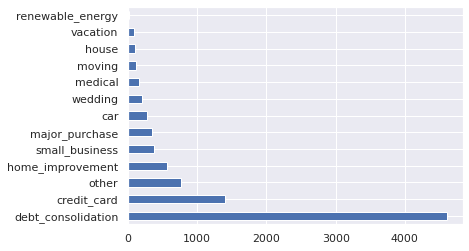

In [99]:
# Purpose of loan
LoanData["purpose"].value_counts()[:20].plot(kind='barh')

In [100]:
# Total amount issued by State
df_location = LoanData.groupby("addr_state",).sum().reset_index()
df_location = df_location.filter(["addr_state", "loan_amnt"], axis = 1)

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'], 
    z = df_location['loan_amnt'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Total amount issued by State',
    geo_scope='usa', 
)

fig.show()

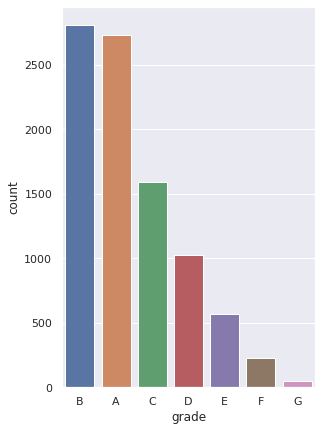

In [101]:
# Grade
plt.figure(figsize=(10, 7))
  
plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= LoanData, order = LoanData['grade'].value_counts().index)

[Text(0.5, 0, 'funded_amnt_inv'),
 Text(1.5, 0, 'int_rate'),
 Text(2.5, 0, 'installment'),
 Text(3.5, 0, 'annual_inc'),
 Text(4.5, 0, 'dti'),
 Text(5.5, 0, 'revol_util'),
 Text(6.5, 0, 'total_pymnt'),
 Text(7.5, 0, 'total_pymnt_inv'),
 Text(8.5, 0, 'total_rec_prncp'),
 Text(9.5, 0, 'total_rec_int')]

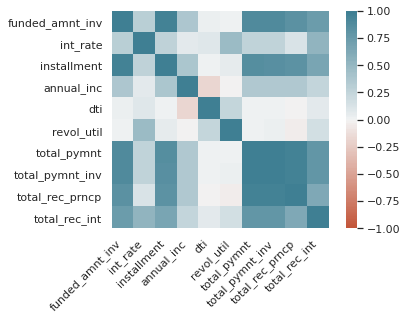

In [102]:
# Correlations
numCol = []
for col in LoanData:
  if LoanData[col].dtype == np.float:
    numCol.append(col)
corr = LoanData[numCol].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')